* Multi-Linear Regression Using Python
  * https://medium.com/swlh/multi-linear-regression-using-python-44bd0d10082d

In [56]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

# Load dataset
df = pd.read_csv('/vectorizer_dep.csv')
df = df.drop(['index'], axis = 1)
df_vectorized_text = df.drop(['Depression_Comments_per_Month_in_Year'], axis = 1)
df_depression_count = df['Depression_Comments_per_Month_in_Year']
print(df.shape)
df

(74, 1124)


,0,1,2,3,4,5,6,7,8,9,...,1114,1115,1116,1117,1118,1119,1120,1121,1122,Depression_Comments_per_Month_in_Year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Building Regression Model.

* linear regression model takes the form
  * Y = β0 + β1X1 + β2X2 + · · · + βpXp + ϵ
* where Xj represents the jth predictor and βj quantifies the association between that variable and the response. We interpret βj as the average effect on Y of a one unit increase in Xj , holding all other predictors fixed.

* An Introduction to Statistical Learning
  * https://www.statlearning.com/ 

In [72]:
# Set independent and dependent variables
X = df_vectorized_text 
y = df_depression_count

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

In [74]:
X = df_vectorized_text
X = sm.add_constant(X) # adding a constant
olsmod = sm.OLS(df_depression_count, X).fit()

Assumption Testing.

* Linearity
  * https://en.wikipedia.org/wiki/Linearity#:~:text=Linearity%20is%20the%20property%20of,is%20closely%20related%20to%20proportionality.
* Homoscedasticity
  * https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity

In [62]:
df['Depression_Monthly_Commments_Count_Prediction'] = olsmod.predict(X)
df['residual'] = olsmod.resid
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1116,1117,1118,1119,1120,1121,1122,Depression_Comments_per_Month_in_Year,Depression_Monthly_Commments_Count_Prediction,residual
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.000000,4.662937e-15
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.485714,-1.485714e+00
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1.000000,1.842970e-14
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3.000000,-4.440892e-16
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.000000,1.887379e-15


Linearity.

* Validate the model by doing residual analysis based a test or assumption.
* This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

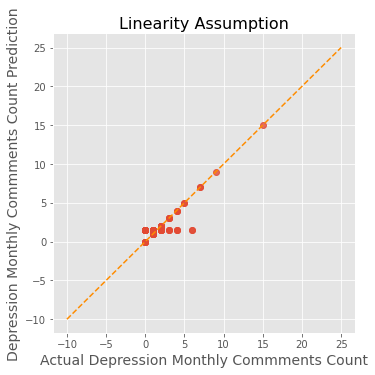

In [63]:
# Plotting the observed vs predicted values
sns.lmplot(x='Depression_Comments_per_Month_in_Year', y='Depression_Monthly_Commments_Count_Prediction', data=df, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df[['Depression_Comments_per_Month_in_Year', 'Depression_Monthly_Commments_Count_Prediction']].min().min()-10, 
                        df[['Depression_Comments_per_Month_in_Year', 'Depression_Monthly_Commments_Count_Prediction']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Depression Monthly Commments Count Prediction', fontsize=14)
plt.xlabel('Actual Depression Monthly Commments Count', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

* The scatter plots show residual points spread reasonably evenly around the diagonal line, so we may be able to assume that there is linear relationship between our independent and dependent variables.

Homoscedasticity.

* Validate model by doing residual analysis based on a test or assumption.
* This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.

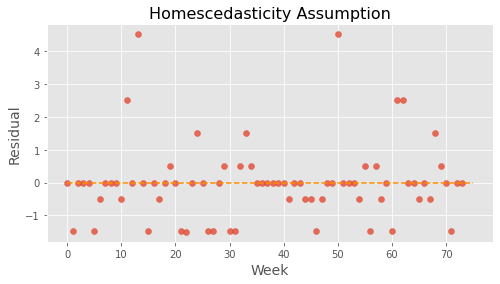

In [71]:

# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df.index, y=df.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

* Homoscedastic distributions are when two or more normal distributions, 
* are both homoscedastic and lack Serial correlation if they share the same diagonals in their covariance matrix, 
* and their non-diagonal entries are zero. Homoscedastic distributions are especially useful to derive statistical pattern recognition and machine learning algorithms. 

* The residual seems to have constant and uniform variance, so we can assume that it satisfied the homoscedasticity assumption.